# Técnicas Matemáticas para Big Data

## Project 02 Hidden Markov Models
https://github.com/s126784/tmbd/

The dataset is available at https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

### GROUP G3:
 - ??? - #60488 - Not Found
 - Nicolas Liebau - #123781 - 50% Work Participation
 - Oleksandr Solovei - #126784 - 50% Work Participation

## 1. Introduction to the problem of study [1,0 valor]

Human Activity Recognition (HAR) using smartphone sensor data has become increasingly important in modern applications, from healthcare monitoring to fitness tracking and smart home automation. The ability to automatically detect and classify human activities through smartphone sensors (accelerometer and gyroscope) presents both opportunities and challenges in data analysis and pattern recognition. 

This study explores the application of Hidden Markov Models (HMM) to the HAR dataset, which contains sensor data collected from 30 subjects performing six basic activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying. HMMs are particularly well-suited for this analysis due to their ability to model sequential data and capture underlying state transitions, making them ideal for understanding the temporal nature of human activities. The study aims to demonstrate how HMMs can effectively model and predict human activities based on smartphone sensor data.

## 2. Brief and general description of the approach and methods used [1.5 valor]

briefandgeneral/briefandgeneral/briefandgeneral/br
iefandgeneral/briefandgeneral/briefandgeneral/briefandgener
al/briefandgeneral/briefandgeneral/briefandgeneral/briefandge
neral/briefandgeneral/briefandgeneral/briefandgeneral/b
riefandgeneral/briefandgeneral/briefandgeneral/

## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

The field of Human Activity Recognition (HAR) has grown quickly. This is because wearable technology and smartphones with sensors have become more common. HAR categorises physical activities based on data from sensors. HAR is used in many areas, including healthcare, sports and smart environments.

The early development of HAR systems used traditional machine learning methods, such as SVM and decision trees, which required a lot of data and knowledge ([Anguita et al., 2013](https://ieeexplore.ieee.org/document/6606013)). These approaches worked well for simple tasks but did not capture the sequential nature of human motion.  

HMMs are used to model temporal dependencies in sequential data. HMMs were first used in speech recognition ([Rabiner, 1989](https://ieeexplore.ieee.org/document/18626)), but soon they were used for HAR tasks. For example, [Mannini and Sabatini (2010)](https://ieeexplore.ieee.org/document/5432200) showed that HMMs can be used to classify physical activities from wearable sensor data. HMMs can capture transitions between activities, such as moving from walking to standing, which static classifiers often miss.

Deep learning methods like LSTM networks are now the best way to do HAR ([Hammerla et al., 2016](https://www.nature.com/articles/srep34731)). These methods don't need manual feature extraction and can learn complex patterns from raw data. They are more expensive to run and harder to understand than HMMs.

HMMs are still useful because they are simple, easy to understand and quick, especially for smaller data sets or when computers are slow. This project uses the GaussianHMM variant for the HAR study. This has been shown to work well for continuous, multidimensional data ([Anguita et al., 2013](https://ieeexplore.ieee.org/document/6606013)).

## 4. About the main method/algorithm used [1,5 valor]

444444

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 6. Dataset and variables explanation [1,5 valor]

In [3]:
# Load training data
# The dataset contains sensor readings from smartphones
# Each record represents measurements from accelerometer and gyroscope
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of samples: {len(train_df)}")
print(f"Number of features: {len(train_df.columns)}")
print("\nActivity distribution:")
print(train_df['Activity'].value_counts())

Dataset Overview:
Number of samples: 7352
Number of features: 563

Activity distribution:
Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64



Selected features: 558


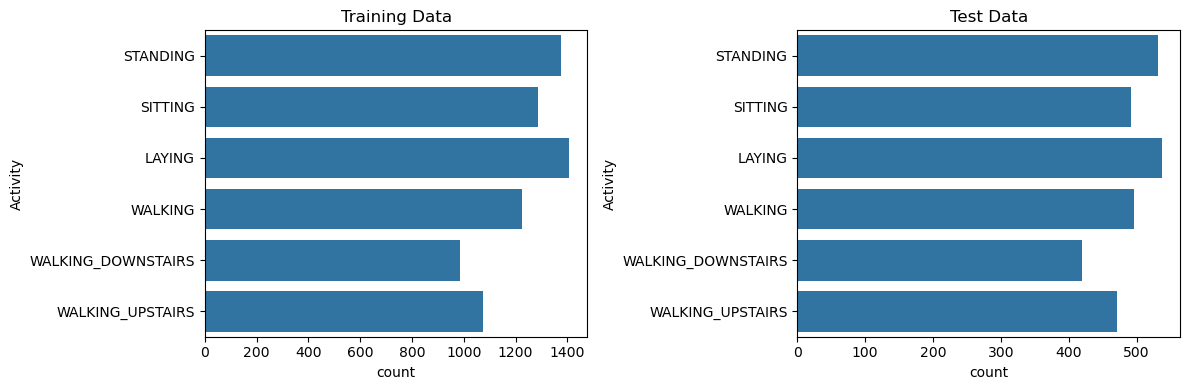

In [5]:
# Select relevant features
# We focus on accelerometer and gyroscope measurements
feature_cols = [col for col in train_df.columns
               if 'acc' in col.lower() or 'gyro' in col.lower()]
print(f"\nSelected features: {len(feature_cols)}")

# Scale the features
# Standardization is important for HMM to work properly
scaler = StandardScaler()
# Fit scaler on training data and transform both sets
X_train = scaler.fit_transform(train_df[feature_cols])
X_test = scaler.transform(test_df[feature_cols])

# Get labels
y_train = train_df['Activity']
y_test = test_df['Activity']

# Plot activity distribution in 1x2 grid as vertical bars
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Training Data')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('Test Data')
plt.tight_layout()
plt.show()


For this project, GaussianHMM is more appropriate because:

 - Sensor data is continuous
 - Multiple features (accelerometer and gyroscope readings)
 - Data approximately follows normal distribution
 - Need to handle multidimensional observations

In [24]:
# n_components = number of hidden states (matches number of activities)
model = hmm.GaussianHMM(
    n_components=6,  # 6 activities
    covariance_type="tied",
    n_iter=10, # ~20 seconds per iteration
    random_state=123781+126784
)

# Train the model
# The model learns:
# - State transition probabilities
# - Emission probabilities
# - Initial state probabilities
model.fit(X_train)

# Predict states
train_states = model.predict(X_train)
test_states = model.predict(X_test)

In [25]:
# Map states to activities using training data
print("Creating state-activity mapping...")
state_activity_map = {}
used_activities = set()
for state in range(6):
    mask = (train_states == state)
    if mask.any():
        # Get activity counts for this state
        activity_counts = y_train[mask].value_counts()
        # Take the most common activity
        state_activity_map[state] = activity_counts.idxmax()
        used_activities.add(activity_counts.idxmax())
# for state in range(6):
#     mask = (train_states == state)
#     if mask.any():
#         # Get activity counts for this state
#         activity_counts = y_train[mask].value_counts()
#         # Take the most common activity that hasn't been used yet
#         for activity in activity_counts.index:
#             if activity not in used_activities:
#                 state_activity_map[state] = activity
#                 used_activities.add(activity)
#                 break

print("State-Activity Mapping:")
print(state_activity_map)

# Convert state predictions to activity predictions
y_pred_train = [state_activity_map[state] for state in train_states]
y_pred_test = [state_activity_map[state] for state in test_states]

# Calculate accuracy
train_set_accuracy = accuracy_score(y_train, y_pred_train)
test_set_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTraining Set Accuracy: {train_set_accuracy:.4f}")
print(f"\nTest Set Accuracy: {test_set_accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Generate classification report
report = classification_report(y_test, y_pred_test)
print("\nClassification Report:")
print(report)


Creating state-activity mapping...
State-Activity Mapping:
{0: 'SITTING', 1: 'WALKING_DOWNSTAIRS', 2: 'LAYING', 3: 'WALKING_UPSTAIRS', 4: 'WALKING_DOWNSTAIRS', 5: 'STANDING'}

Training Set Accuracy: 0.6217

Test Set Accuracy: 0.6413

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.98       537
           SITTING       0.64      0.05      0.10       491
          STANDING       0.52      0.98      0.68       532
           WALKING       0.00      0.00      0.00       496
WALKING_DOWNSTAIRS       0.54      0.91      0.68       420
  WALKING_UPSTAIRS       0.65      0.93      0.76       471

          accuracy                           0.64      2947
         macro avg       0.56      0.64      0.53      2947
      weighted avg       0.56      0.64      0.54      2947




State to Activity Mapping:
State 0 -> SITTING
State 1 -> WALKING_DOWNSTAIRS
State 2 -> LAYING
State 3 -> WALKING_UPSTAIRS
State 4 -> WALKING_DOWNSTAIRS
State 5 -> STANDING


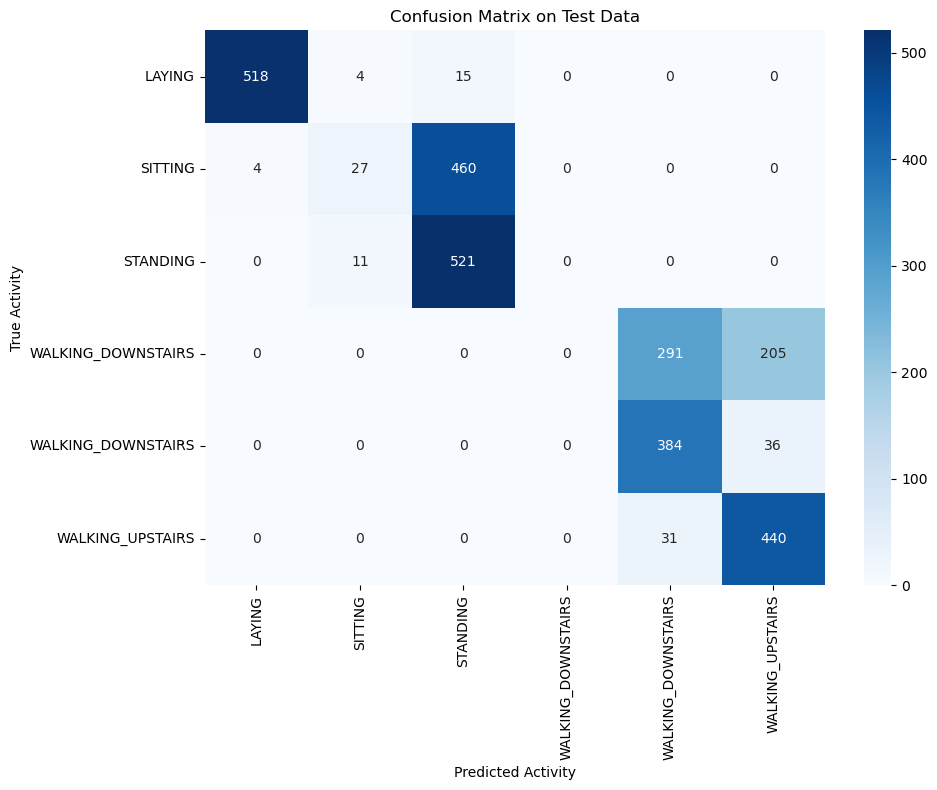

In [26]:

###########################################
# 6. VISUALIZE RESULTS
###########################################

# Print state mapping
print("\nState to Activity Mapping:")
for state, activity in state_activity_map.items():
    print(f"State {state} -> {activity}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
activities = sorted(state_activity_map.values())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=activities,
            yticklabels=activities)
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True Activity')
plt.xlabel('Predicted Activity')
plt.tight_layout()
plt.show()

In [27]:
###########################################
# 7. DETAILED STATE ANALYSIS
###########################################

# Calculate state distribution
print("\nState Distribution in Test Data:")
state_counts = pd.Series(test_states).value_counts()
for state in range(6):
    count = state_counts.get(state, 0)
    activity = state_activity_map.get(state, 'Unknown')
    print(f"State {state} ({activity}): {count} samples")

# Calculate transition matrix for test data
transitions = pd.DataFrame(columns=['from_state', 'to_state', 'count'])
for i in range(len(test_states)-1):
    transition = pd.DataFrame({
        'from_state': [test_states[i]],
        'to_state': [test_states[i+1]],
        'count': [1]
    })
    transitions = pd.concat([transitions, transition])

# Create transition matrix
transition_matrix = transitions.groupby(
    ['from_state', 'to_state']
)['count'].sum().unstack(fill_value=0)

print("\nTransition Matrix in Test Data:")
print(transition_matrix)


State Distribution in Test Data:
State 0 (SITTING): 42 samples
State 1 (WALKING_DOWNSTAIRS): 9 samples
State 2 (LAYING): 522 samples
State 3 (WALKING_UPSTAIRS): 681 samples
State 4 (WALKING_DOWNSTAIRS): 697 samples
State 5 (STANDING): 996 samples

Transition Matrix in Test Data:
to_state     0  1    2    3    4    5
from_state                           
0            6  0    4    0    0   32
1            0  2    0    0    7    0
2            2  0  503    6   11    0
3            3  0    0  632   34   11
4            0  7    0   42  645    3
5           31  0   15    1    0  949


In [28]:
results_df = pd.DataFrame({
    'True_Activity': y_test,
    'Predicted_Activity': y_pred_test
})
results_df.to_csv('predictions.csv', index=False)
results_df.sample(32)

,True_Activity,Predicted_Activity
649,SITTING,STANDING
1230,SITTING,STANDING
2866,WALKING,WALKING_UPSTAIRS
1651,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS
220,LAYING,LAYING
248,WALKING,WALKING_DOWNSTAIRS
1580,LAYING,LAYING
1382,STANDING,STANDING
1199,WALKING_UPSTAIRS,WALKING_UPSTAIRS
2916,WALKING_UPSTAIRS,WALKING_UPSTAIRS


## References:

1. **Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013).**  
   A Public Domain Dataset for Human Activity Recognition Using Smartphones.  
   *21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning (ESANN)*.  
   [Access Paper](https://ieeexplore.ieee.org/document/6606013)  

2. **Rabiner, L. R. (1989).**  
   A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition.  
   *Proceedings of the IEEE*.  
   [Access Paper](https://ieeexplore.ieee.org/document/18626)

3. **Mannini, A., & Sabatini, A. M. (2010).**  
   Machine Learning Methods for Classifying Human Physical Activity From On-Body Accelerometers.  
   *Sensors (Basel)*.  
   [Access Paper](https://ieeexplore.ieee.org/document/5432200)

4. **Hammerla, N. Y., Halloran, S., & Ploetz, T. (2016).**  
   Deep, Convolutional, and Recurrent Models for Human Activity Recognition Using Wearables.  
   *arXiv*.  
   [Access Paper](https://arxiv.org/abs/1604.08880)